In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
offers = pd.read_csv('offers.csv')
test = pd.read_csv('testHistory.csv')
train=pd.read_csv('trainHistory.csv')
train.describe()
test.describe()
offers.describe()


,offer,category,quantity,company,offervalue,brand
count,3.700000e+01,37.000000,37.000000,3.700000e+01,37.000000,37.000000
mean,1.207324e+06,4775.378378,1.027027,2.376693e+08,1.648649,19675.135135
std,1.009963e+04,2492.239124,0.164399,3.389608e+08,0.734704,28084.740447
min,1.190530e+06,706.000000,1.000000,1.033200e+08,0.750000,875.000000
25%,1.199258e+06,2202.000000,1.000000,1.044600e+08,1.500000,4294.000000
50%,1.204576e+06,5558.000000,1.000000,1.054500e+08,1.500000,7668.000000
75%,1.219900e+06,6202.000000,1.000000,1.071280e+08,1.500000,17286.000000
max,1.230218e+06,9909.000000,2.000000,1.089520e+09,5.000000,102504.000000


In [3]:
test.columns

Index(['id', 'chain', 'offer', 'market', 'offerdate'], dtype='object')

In [4]:
train.columns

Index(['id', 'chain', 'offer', 'market', 'repeattrips', 'repeater',
       'offerdate'],
      dtype='object')

In [5]:
offers.columns

Index(['offer', 'category', 'quantity', 'company', 'offervalue', 'brand'], dtype='object')

# Univariate Analysis

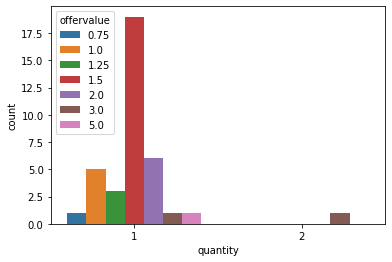

In [6]:
sns.countplot(x='quantity',hue='offervalue',data=offers)

From the above plot it is clear that,
The quantity 1 has more offervalues  than the quantity 2.
The offervalue 1.5 has highest quantity.
Mostly the offer value lies between 1 to 6 offer value. 


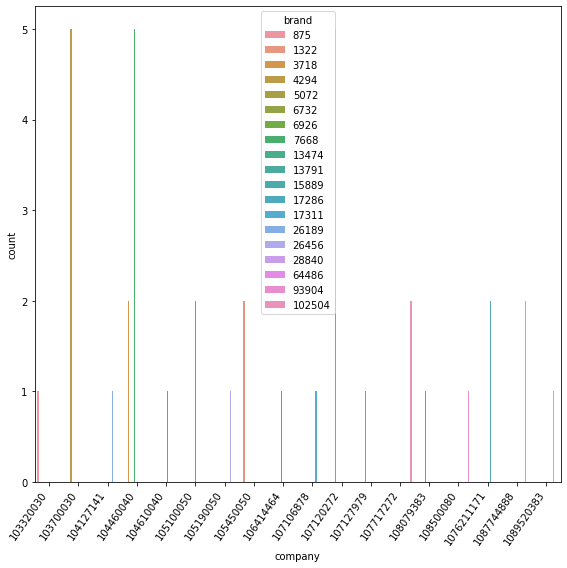

<Figure size 432x288 with 0 Axes>

In [7]:
#sns.countplot(x='company',hue='brand',data=offers,rotation=45)
plt.figure(figsize=(8,8))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='company',hue='brand', data=offers)
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

From the graph it is clear that the two companies has highest values equal to 5.Others companies have value equal less than or equal to 2. 

Let’s concatenate the train and test data sets

In [8]:
df = pd.concat([train, test], sort = False)
print(train.shape, test.shape,df.shape)

(160057, 7) (151484, 5) (311541, 7)


In [9]:
df.dtypes

id               int64
chain            int64
offer            int64
market           int64
repeattrips    float64
repeater        object
offerdate       object
dtype: object

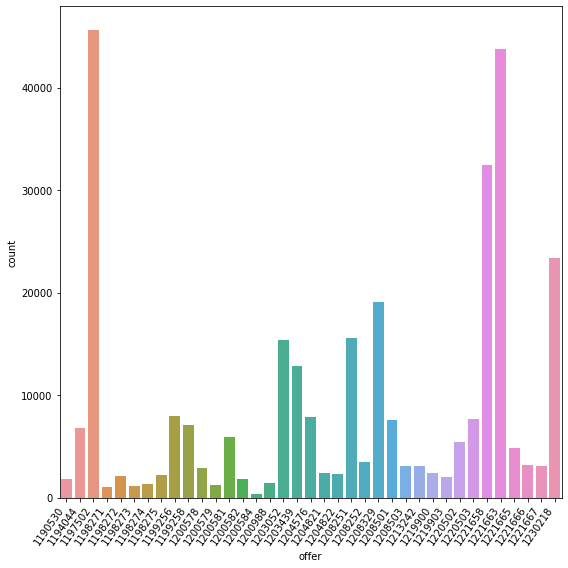

<Figure size 432x288 with 0 Axes>

In [10]:
#sns.distplot(df['offer'],kde=False,bins=10)
plt.figure(figsize=(8,8))
#sns.countplot(x='Item_Type', data=df)

ax=sns.countplot(x='offer', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

The highest offer is above the value of 40000 and the lowest offer value is below the 1000.Out of all offers only 4 offer values are more than 20000 others are less than that.


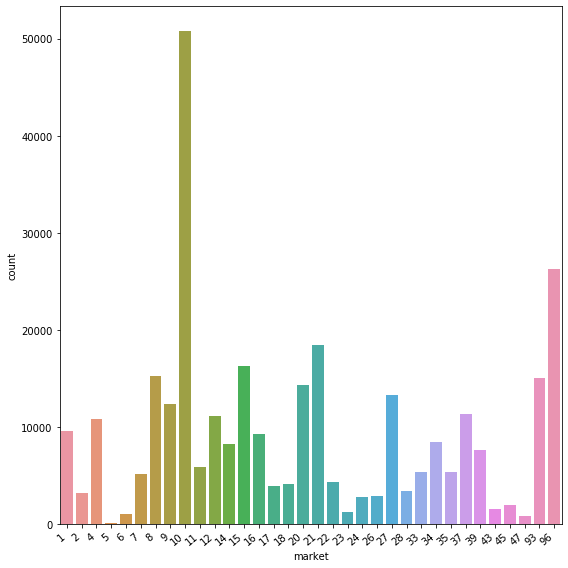

<Figure size 432x288 with 0 Axes>

In [11]:
#sns.countplot(x='market',data=df)
plt.figure(figsize=(8,8))

ax=sns.countplot(x='market', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
sns.despine()

The above graph indicates that, 
The market number 10  the highest number of sales of 50000.
The market number 5 has the lowest number of sales.
Most of the market sales lies between 1000 to 25000.


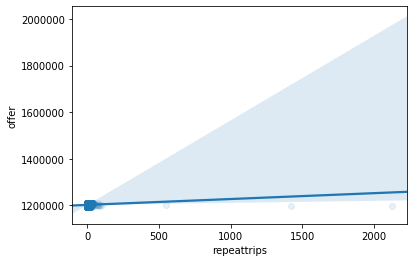

In [12]:
sns.regplot(x='repeattrips', y='offer', data=df,scatter_kws={'alpha':0.1})

This graph represents the positive correlation between the repeat trips and the offers
With the increase in number of the offers the repeat trips also increases.

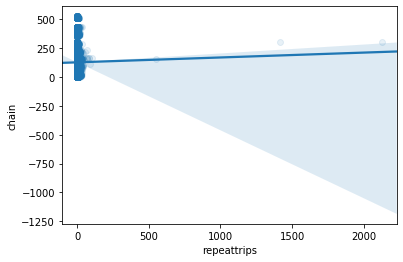

In [13]:
sns.regplot(x='repeattrips', y='chain', data=df,scatter_kws={'alpha':0.1})

The plot indicates that the Repeattrips and the chain has negative correlation.
The intensity of Repeattrips plunges with the rise in chain value.

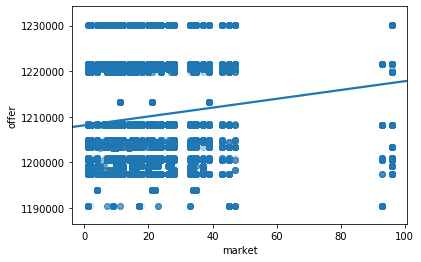

In [14]:
sns.regplot(x='market', y='offer', data=df,scatter_kws={'alpha':0.1})

The above plot shows that the market and offer has the positive correlation.The market from 50 and 90 has no offers.

# Data Cleaning

In [15]:
df.apply(lambda x : sum(x.isnull()))

id                  0
chain               0
offer               0
market              0
repeattrips    151484
repeater       151484
offerdate           0
dtype: int64

The number of repeattrips and repeater has same number of null values 151484.

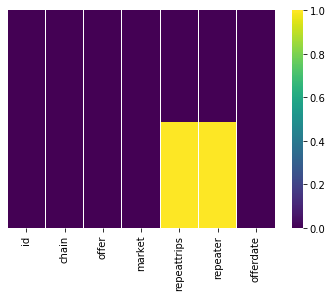

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

The heatmap shows the repeattrips and repeater have null values shown with yellow color

Imputing the null values

In [17]:
df.repeattrips=df.repeattrips.fillna(df.repeattrips.mean())

In [18]:
df.repeater=df.repeater.fillna('Missing')

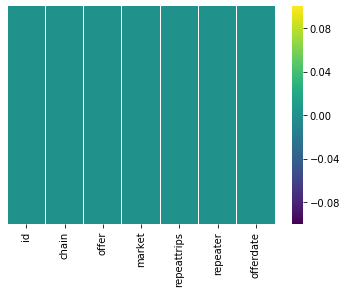

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [20]:
df.apply(lambda x : sum(x.isnull()))

id             0
chain          0
offer          0
market         0
repeattrips    0
repeater       0
offerdate      0
dtype: int64

The number of null values are zero in this case.

In [21]:
df.dtypes

id               int64
chain            int64
offer            int64
market           int64
repeattrips    float64
repeater        object
offerdate       object
dtype: object

In [22]:
df.corr()

,id,chain,offer,market,repeattrips
id,1.000000,0.351551,0.181102,0.289573,0.012423
chain,0.351551,1.000000,0.187122,0.844193,0.001315
offer,0.181102,0.187122,1.000000,0.244875,0.011006
market,0.289573,0.844193,0.244875,1.000000,-0.005347
repeattrips,0.012423,0.001315,0.011006,-0.005347,1.000000


Converting the categorical variables into dummy variables to fit them into the machine learning models

In [23]:
df=pd.get_dummies(df, columns=['offerdate'])

In [24]:
df.head()

,id,chain,offer,market,repeattrips,repeater,offerdate_2013-03-01,offerdate_2013-03-02,offerdate_2013-03-03,offerdate_2013-03-04,...,offerdate_2013-07-22,offerdate_2013-07-23,offerdate_2013-07-24,offerdate_2013-07-25,offerdate_2013-07-26,offerdate_2013-07-27,offerdate_2013-07-28,offerdate_2013-07-29,offerdate_2013-07-30,offerdate_2013-07-31
0,86246,205,1208251,34,5.0,t,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,86252,205,1197502,34,16.0,t,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12682470,18,1197502,11,0.0,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12996040,15,1197502,9,0.0,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,13089312,15,1204821,9,0.0,f,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Selecting the 'repeater' feature as target
df_target=df['repeater']

In [26]:
#Dropping the target feature from the data frame as we will predict it from our model
df=df.drop(['repeater'],axis=1)

In [27]:
# spliting the data into training and test sample
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.30, random_state = 0)


In [28]:

from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours


In [29]:
from sklearn import metrics #for checking the model accuracy
model=KNeighborsClassifier(n_neighbors=7) #this examines 3 neighbours for putting the new data into a class
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.6541947080662937


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(x_train, y_train)   
a_index=list(range(1,11))
a=pd.Series()
# Calculate the accuracy of the model for different values of k
for i in np.arange(1, 10):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train, y_train)
    print("For k = %d accuracy is"%i,knn2.score(x_test,y_test))
# Visual presentation: Various values of n for K-Nearest nerighbours
print("\nVisual presentation: Various values of n for K-Nearest nerighbours:")    
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test)))
plt.plot(a_index, a)

For k = 1 accuracy is 0.6716133657169148
For k = 2 accuracy is 0.6847629543241711
For k = 3 accuracy is 0.6634711062131539
For k = 4 accuracy is 0.6735713597894354
For k = 5 accuracy is 0.664155869167478
For k = 6 accuracy is 0.6613954185078588
For k = 7 accuracy is 0.6541947080662937
For k = 8 accuracy is 0.6528893786846132
For k = 9 accuracy is 0.6464376277243401

Visual presentation: Various values of n for K-Nearest nerighbours:


In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
logmodel = LogisticRegression()
logmodel.fit(x_train, y_train)
 
predictions = logmodel.predict(x_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))